In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', None)

In [2]:

data=pd.read_excel("Phishing_Legitimate_full.xlsx")
data.head()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
data.shape

(10000, 50)

In [4]:

x=data.iloc[:, 1:-1]
y = data['CLASS_LABEL']

In [5]:
x

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1


In [6]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [7]:
data[data.isnull().any(axis=1)]


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL


In [8]:
x.shape

(10000, 48)

In [9]:
clean_data = data.copy()

In [10]:
from sklearn.model_selection import train_test_split
#X = data.copy()
#y = data['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( min_samples_split = 4)
clf = clf.fit(X_train, y_train)

In [12]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [15]:
feature_names = x.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names)


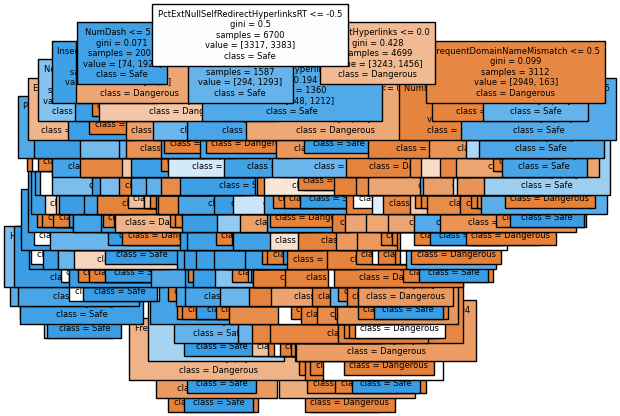

In [16]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figurefigsize = (15000,10000)
_= tree.plot_tree(clf, feature_names = feature_names,
                     class_names = {0 :'Dangerous', 1: 'Safe'},
                      filled = True,
                      fontsize = 6)

In [17]:
accuracy_score(y_test, predictions)


0.9660606060606061

In [18]:
confusion_matrix(y_test, predictions, labels = [0,1])


array([[1622,   61],
       [  51, 1566]], dtype=int64)

In [19]:
precision_score(y_test, predictions)

0.9625076828518746

In [20]:
recall_score(y_test, predictions)

0.9684601113172542

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1683
           1       0.96      0.97      0.97      1617

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300

